# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
print(cities)

['christchurch', 'busselton', 'muravlenko', 'hilo', 'provideniya', 'agdas', 'jamestown', 'albany', 'male', 'ilulissat', 'mataura', 'basoko', 'shimoda', 'rikitea', 'mto wa mbu', 'sentyabrskiy', 'broome', 'cockburn town', 'south lake tahoe', 'vaini', 'maitum', 'hasaki', 'grafton', 'punta arenas', 'cape town', 'faya', 'samusu', 'la ronge', 'yellowknife', 'luderitz', 'kaitangata', 'puerto colombia', 'srednekolymsk', 'georgetown', 'butaritari', 'chara', 'satna', 'lompoc', 'hami', 'mantua', 'saskylakh', 'taolanaro', 'shangqiu', 'chopinzinho', 'attawapiskat', 'kodiak', 'port alfred', 'carnarvon', 'linxia', 'victoria', 'illoqqortoormiut', 'petropavlovsk-kamchatskiy', 'guantanamo', 'bredasdorp', 'svetlyy', 'adre', 'liepaja', 'puri', 'eydhafushi', 'belushya guba', 'barrow', 'gangotri', 'belyy', 'kapaa', 'baykit', 'asheboro', 'bengkulu', 'alofi', 'rocha', 'nanning', 'hobart', 'abalak', 'kjollefjord', 'ygatimi', 'grand river south east', 'lebu', 'bonavista', 'inhambane', 'pisco', 'robertsport', 'g

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#create base url & query url
base_url = 'http://api.openweathermap.org/data/2.5/weather?'

units = 'imperial'

query_url = base_url + "units=" + units + "&appid=" + weather_api_key
print(query_url)

http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=e12ce9f247c079f7a7228362970b8381


In [4]:
#generate a list to store teh city data
cloudinesses = []
cities_list = []
dates = []
humidities = []
lat = []
lon = []
temp_max = []
wind_speeds = []
countries = []

# keep track of the record and set being processed
record =0
sets = 1

print("--------------------------Beginning Data Retrieval----------------------------")
for city in cities:
   
    
    #print(response)
    try:
        print(f"Processing Record {record} of set {sets} | {city}")
        
        city_url = query_url + "&q=" + city
        response = requests.get(city_url).json()
        time.sleep(1)
        
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        cities_list.append(response['name'])
        cloudinesses.append(response['clouds']['all'])
        humidities.append(response['main']['humidity'])
        wind_speeds.append(response['wind']['speed'])
        temp_max.append(response['main']['temp'])
    

        print(response['name'])
        record += 1
    except:
         print(f"City not found. Skipping...")

    if record == 50:
        sets += 1
        record = 1
      
  
print('---------------------Data Retrival Complete------------------------')            

--------------------------Beginning Data Retrieval----------------------------
Processing Record 0 of set 1 | christchurch
Christchurch
Processing Record 1 of set 1 | busselton
Busselton
Processing Record 2 of set 1 | muravlenko
Muravlenko
Processing Record 3 of set 1 | hilo
Hilo
Processing Record 4 of set 1 | provideniya
Provideniya
Processing Record 5 of set 1 | agdas
Ağdaş
Processing Record 6 of set 1 | jamestown
Jamestown
Processing Record 7 of set 1 | albany
Albany
Processing Record 8 of set 1 | male
Malé
Processing Record 9 of set 1 | ilulissat
Ilulissat
Processing Record 10 of set 1 | mataura
Mataura
Processing Record 11 of set 1 | basoko
Basoko
Processing Record 12 of set 1 | shimoda
Shimoda
Processing Record 13 of set 1 | rikitea
Rikitea
Processing Record 14 of set 1 | mto wa mbu
Mto wa Mbu
Processing Record 15 of set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 15 of set 1 | broome
Broome
Processing Record 16 of set 1 | cockburn town
Cockburn Town
Processing

Beisfjord
Processing Record 1 of set 4 | lavrentiya
Lavrentiya
Processing Record 2 of set 4 | magistralnyy
Magistral'nyy
Processing Record 3 of set 4 | sitka
Sitka
Processing Record 4 of set 4 | likasi
Likasi
Processing Record 5 of set 4 | pevek
Pevek
Processing Record 6 of set 4 | sabang
Sabang
Processing Record 7 of set 4 | marystown
Marystown
Processing Record 8 of set 4 | aykhal
Aykhal
Processing Record 9 of set 4 | manjakandriana
Manjakandriana
Processing Record 10 of set 4 | lufkin
Lufkin
Processing Record 11 of set 4 | hokitika
Hokitika
Processing Record 12 of set 4 | dikson
Dikson
Processing Record 13 of set 4 | port elizabeth
Port Elizabeth
Processing Record 14 of set 4 | sakakah
Sakakah
Processing Record 15 of set 4 | tonj
Tonj
Processing Record 16 of set 4 | grand gaube
Grand Gaube
Processing Record 17 of set 4 | amarante
Amarante
Processing Record 18 of set 4 | new norfolk
New Norfolk
Processing Record 19 of set 4 | tahe
Tahe
Processing Record 20 of set 4 | dudinka
Dudinka


São Filipe
Processing Record 5 of set 7 | smithers
Smithers
Processing Record 6 of set 7 | marawi
Marawi
Processing Record 7 of set 7 | santa maria del rio
Santa María del Río
Processing Record 8 of set 7 | bongaree
Bongaree
Processing Record 9 of set 7 | chimore
Chimoré
Processing Record 10 of set 7 | safwah
City not found. Skipping...
Processing Record 10 of set 7 | byron bay
Byron Bay
Processing Record 11 of set 7 | flinders
Flinders
Processing Record 12 of set 7 | bethel
Bethel
Processing Record 13 of set 7 | nouadhibou
Nouadhibou
Processing Record 14 of set 7 | kruisfontein
Kruisfontein
Processing Record 15 of set 7 | esperance
Esperance
Processing Record 16 of set 7 | khonuu
City not found. Skipping...
Processing Record 16 of set 7 | kangaba
Kangaba
Processing Record 17 of set 7 | togur
Togur
Processing Record 18 of set 7 | lafia
Lafia
Processing Record 19 of set 7 | itoman
Itoman
Processing Record 20 of set 7 | tyrma
Tyrma
Processing Record 21 of set 7 | saint-pierre
Saint-Pierr

Xapuri
Processing Record 48 of set 9 | klyuchi
Klyuchi
Processing Record 49 of set 9 | korla
Korla
Processing Record 1 of set 10 | haimen
Haimen
Processing Record 2 of set 10 | gra liyia
Gra Lygia
Processing Record 3 of set 10 | bubanza
Bubanza Province
Processing Record 4 of set 10 | kurilsk
Kuril'sk
Processing Record 5 of set 10 | sao miguel do araguaia
São Miguel do Araguaia
Processing Record 6 of set 10 | nikolayevsk-na-amure
Nikolayevsk-on-Amur
Processing Record 7 of set 10 | krosno odrzanskie
Krosno Odrzańskie
Processing Record 8 of set 10 | esperanza
Esperanza
Processing Record 9 of set 10 | mataram
Mataram
Processing Record 10 of set 10 | itarema
Itarema
Processing Record 11 of set 10 | ossora
Ossora
Processing Record 12 of set 10 | arlit
Arlit
Processing Record 13 of set 10 | ascension
Ascension
Processing Record 14 of set 10 | teahupoo
Teahupoo
Processing Record 15 of set 10 | wasilla
Wasilla
Processing Record 16 of set 10 | punta alta
Punta Alta
Processing Record 17 of set 1

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
response

{'coord': {'lon': -59.8119, 'lat': -3.2003},
 'weather': [{'id': 500,
   'main': 'Rain',
   'description': 'light rain',
   'icon': '10n'}],
 'base': 'stations',
 'main': {'temp': 77.05,
  'feels_like': 86.88,
  'temp_min': 75.2,
  'temp_max': 78.8,
  'pressure': 1011,
  'humidity': 94},
 'visibility': 10000,
 'wind': {'speed': 1.14, 'deg': 320},
 'rain': {'1h': 0.24},
 'clouds': {'all': 0},
 'dt': 1614230282,
 'sys': {'type': 1,
  'id': 8412,
  'country': 'BR',
  'sunrise': 1614247623,
  'sunset': 1614291470},
 'timezone': -14400,
 'id': 3402920,
 'name': 'Careiro da Várzea',
 'cod': 200}

In [24]:
print(len(dates))


571


In [25]:
#create pandas df
weather_df = pd.DataFrame({"Country": countries,
                           "City": cities_list,
                           "Lat": lat,
                           "Lon":lon,
                           "Date": dates,
                           "Max Temp (F)": temp_max,
                           "Humidities %": humidities,
                           "Cloudinesses": cloudinesses,
                           "Wind Speed": wind_speeds})
#display the df
weather_df.head()

,Country,City,Lat,Lon,Date,Max Temp (F),Humidities %,Cloudinesses,Wind Speed
0,NZ,Christchurch,-43.5333,172.6333,1614229429,62.64,67,90,8.05
1,AU,Busselton,-33.6500,115.3333,1614229430,79.68,46,4,6.46
2,RU,Muravlenko,63.7898,74.5230,1614229431,-28.03,85,7,6.29
3,US,Hilo,19.7297,-155.0900,1614229219,67.87,78,75,6.91
4,RU,Provideniya,64.3833,-173.3000,1614229434,5.00,72,0,13.42


In [26]:
weather_df.tail(25)

#save data to csv
weather_df.to_csv(output_data, index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
# Get the indices of cities that have humidity over 100%.
new_weather_df = weather_df[weather_df["Humidities %"] < 100 ]
weather_df = new_weather_df.dropna(how='all')
weather_df


,Countries,City,Lat,Lon,Date,Max Temp (F),Humidities %,Cloudinesses,Wind Speed
0,NZ,Christchurch,-43.5333,172.6333,1614229429,62.64,67,90,8.05
1,AU,Busselton,-33.6500,115.3333,1614229430,79.68,46,4,6.46
2,RU,Muravlenko,63.7898,74.5230,1614229431,-28.03,85,7,6.29
3,US,Hilo,19.7297,-155.0900,1614229219,67.87,78,75,6.91
4,RU,Provideniya,64.3833,-173.3000,1614229434,5.00,72,0,13.42
...,...,...,...,...,...,...,...,...,...
566,US,Kahului,20.8947,-156.4700,1614230276,69.49,64,40,20.71
567,BR,Pitimbu,-7.4706,-34.8086,1614230278,78.80,94,75,3.44
568,CL,Coyhaique,-45.5752,-72.0662,1614230279,50.67,98,17,3.15
569,CN,Yunyang,33.4474,112.7142,1614230281,48.00,39,99,15.14


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

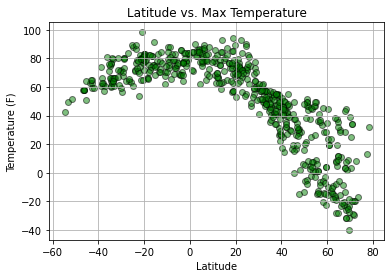

In [10]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Lat"], weather_df["Max Temp (F)"],
            marker="o",
            facecolors="green",
            edgecolors="black",
            alpha = 0.5 )

# Incorporate the other graph properties
plt.title(f'Latitude vs. Max Temperature')
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Lat_Vs_Max_Temp.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

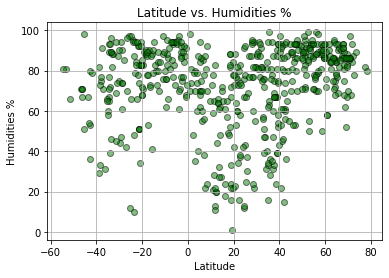

In [11]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Lat"], weather_df["Humidities %"],
            marker="o",
            facecolors="green",
            edgecolors="black",
            alpha = 0.5 )

# Incorporate the other graph properties
plt.title(f'Latitude vs. Humidities %')
plt.ylabel("Humidities %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Lat_Vs_Humidities.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

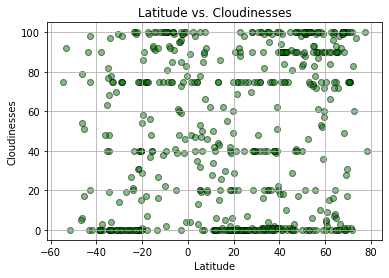

In [12]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Lat"], weather_df["Cloudinesses"],
            marker="o",
            facecolors="green",
            edgecolors="black",
            alpha = 0.5 )

# Incorporate the other graph properties
plt.title(f'Latitude vs. Cloudinesses')
plt.ylabel("Cloudinesses")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Lat_Vs_Cloudinesses.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

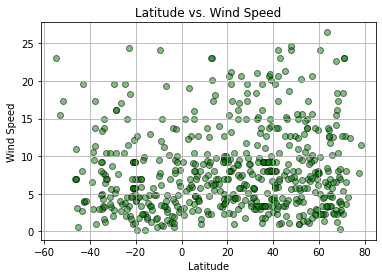

In [13]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"],
            marker="o",
            facecolors="green",
            edgecolors="black",
            alpha = 0.5 )

# Incorporate the other graph properties
plt.title(f'Latitude vs. Wind Speed')
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Lat_Vs_Wind Speed.png")

# Show plot
plt.show()

## Linear Regression

In [14]:
#create df for the two different hemisphere
northern_hemi = weather_df.loc[weather_df["Lat"] >= 0.0]
northern_hemi

southern_hemi = weather_df.loc[weather_df["Lat"] < 0.0]
southern_hemi

,Countries,City,Lat,Lon,Date,Max Temp (F),Humidities %,Cloudinesses,Wind Speed
0,NZ,Christchurch,-43.5333,172.6333,1614229429,62.64,67,90,8.05
1,AU,Busselton,-33.6500,115.3333,1614229430,79.68,46,4,6.46
10,NZ,Mataura,-46.1927,168.8643,1614229442,57.99,71,79,7.00
13,PF,Rikitea,-23.1203,-134.9692,1614229447,79.20,79,100,24.38
14,TZ,Mto wa Mbu,-3.3500,35.8500,1614229256,70.56,71,95,0.58
...,...,...,...,...,...,...,...,...,...
558,AO,Mossamedes,-15.1961,12.1522,1614230039,68.43,79,93,1.86
564,BR,Cururupu,-1.8283,-44.8683,1614230274,75.09,92,39,3.40
567,BR,Pitimbu,-7.4706,-34.8086,1614230278,78.80,94,75,3.44
568,CL,Coyhaique,-45.5752,-72.0662,1614230279,50.67,98,17,3.15


In [15]:
# Generate x and y values 
x_values = weather_df["Lat"]
y_values = weather_df["Max Temp (F)"]

# linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

# line equation 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

0      95.821009
1      88.775779
2      19.316610
3      50.724494
4      18.893539
         ...    
566    49.894033
567    70.114007
568    97.276561
569    40.945943
570    67.069958
Name: Lat, Length: 558, dtype: float64
y = -0.71x + 64.79


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7527389827032474


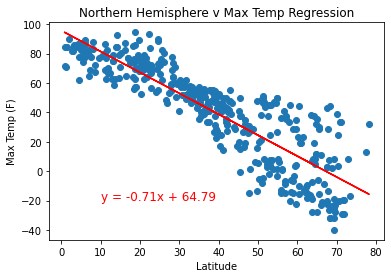

In [34]:
# the x and y values
x_values = northern_hemi["Lat"]
y_values = northern_hemi["Max Temp (F)"]

# scatter plot
plt.scatter(x_values,y_values)

# linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#regression values
regress_values = x_values * slope + intercept

# regression values
plt.plot(x_values,regress_values,"r-")

# Label plot 
plt.title("Northern Hemisphere v Max Temp Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

# annoations,color,fontsize
plt.annotate(line_eq,(10,-20), fontsize=12, color="red",)

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the plotted figure as .pngs
plt.savefig("output_data/nh_Vs_max_temp.png")

# Show plot
plt.show()

The graph above is showing a negative correlation 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.3355764012930509


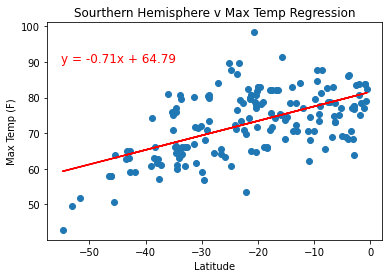

In [29]:
# the x and y values
x_values = southern_hemi["Lat"]
y_values = southern_hemi["Max Temp (F)"]

# scatter plot
plt.scatter(x_values,y_values)

# linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#regression values
regress_values = x_values * slope + intercept

# Generate regression values
plt.plot(x_values,regress_values,"r-")

# Label plot 
plt.title("Sourthern Hemisphere v Max Temp Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

# annoations,color,fontsize
plt.annotate(line_eq,(-55,90), fontsize=12, color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the plotted figure as .pngs
plt.savefig("output_data/sh_Vs_maxtemp.png")

# Show plot
plt.show()

The graph above is showing a positive correlation 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.18225117139485897


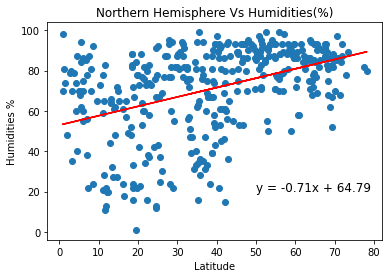

In [18]:
# the x and y values
x_values = northern_hemi["Lat"]
y_values = northern_hemi["Humidities %"]

# scatter plot
plt.scatter(x_values,y_values)

# linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#regression values
regress_values = x_values * slope + intercept

# Generate regression values
plt.plot(x_values,regress_values,"r-")

# Label plot 
plt.title("Northern Hemisphere Vs Humidities(%)")
plt.xlabel("Latitude")
plt.ylabel("Humidities %")

# annoations,color,fontsize
plt.annotate(line_eq,(50,20), fontsize=12, color="black")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the plotted figure as .pngs
plt.savefig("output_data/nh_Vs_Humidities.png")

# Show plot
plt.show()

The graph above is showing no correlation btw northern hemisphere and humidities. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.09265049365004513


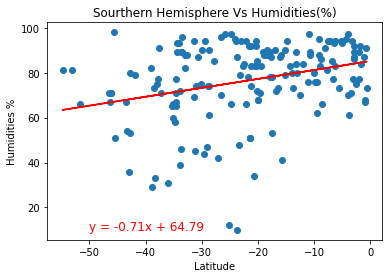

In [19]:
# the x and y values
x_values = southern_hemi["Lat"]
y_values = southern_hemi["Humidities %"]

# scatter plot
plt.scatter(x_values,y_values)

# linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#regression values
regress_values = x_values * slope + intercept

# Generate regression values
plt.plot(x_values,regress_values,"r-")

# Label plot 
plt.title("Sourthern Hemisphere Vs Humidities(%)")
plt.xlabel("Latitude")
plt.ylabel("Humidities %")

# annoations,color,fontsize
plt.annotate(line_eq,(-50,10), fontsize=12, color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the plotted figure as .pngs
plt.savefig("output_data/sh_Vs_Humidities.png")

# Show plot
plt.show()

The graph above is showing no correlation btw sourthern hemisphere and humidities. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.06619466459662919


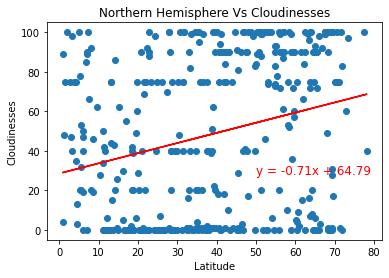

In [20]:
# the x and y values
x_values = northern_hemi["Lat"]
y_values = northern_hemi["Cloudinesses"]

# scatter plot
plt.scatter(x_values,y_values)

# linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#regression values
regress_values = x_values * slope + intercept

# Generate regression values
plt.plot(x_values,regress_values,"r-")

# Label plot 
plt.title("Northern Hemisphere Vs Cloudinesses")
plt.xlabel("Latitude")
plt.ylabel("Cloudinesses")

# annoations,color,fontsize
plt.annotate(line_eq,(50,28), fontsize=12, color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the plotted figure as .pngs
plt.savefig("output_data/nh_Vs_Cloudinesses.png")

# Show plot
plt.show()

The graph above is showing no correlation 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.13966843124263992


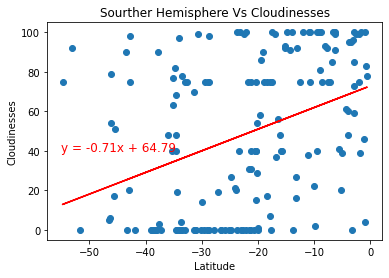

In [21]:
# the x and y values
x_values = southern_hemi["Lat"]
y_values = southern_hemi["Cloudinesses"]

# scatter plot
plt.scatter(x_values,y_values)

# linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#regression values
regress_values = x_values * slope + intercept

# Generate regression values
plt.plot(x_values,regress_values,"r-")

# Label plot 
plt.title("Sourther Hemisphere Vs Cloudinesses")
plt.xlabel("Latitude")
plt.ylabel("Cloudinesses")

# annoations,color,fontsize
plt.annotate(line_eq,(-55,40), fontsize=12, color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the plotted figure as .pngs
plt.savefig("output_data/SH_Vs_Cloudinesses.png")

# Show plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 2.7782842652635185e-05


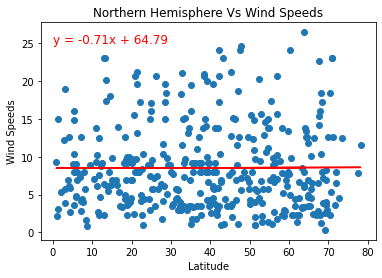

In [30]:
# the x and y values
x_values = northern_hemi["Lat"]
y_values = northern_hemi["Wind Speed"]

# scatter plot
plt.scatter(x_values,y_values)

# linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#regression values
regress_values = x_values * slope + intercept

# Generate regression values
plt.plot(x_values,regress_values,"r-")

# Label plot 
plt.title("Northern Hemisphere Vs Wind Speeds")
plt.xlabel("Latitude")
plt.ylabel("Wind Speeds")

# annoations,color,fontsize
plt.annotate(line_eq,(0,25), fontsize=12, color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the plotted figure as .pngs
plt.savefig("output_data/NH_Vs_Wind Speed.png")

# Show plot
plt.show()

The graph above is showing no correlation btw northern hemisphere and humidities. 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04516672981861174


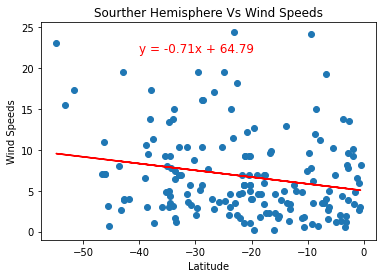

In [33]:
# the x and y values
x_values = southern_hemi["Lat"]
y_values = southern_hemi["Wind Speed"]

# scatter plot
plt.scatter(x_values,y_values)

# linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#regression values
regress_values = x_values * slope + intercept

# Generate regression values
plt.plot(x_values,regress_values,"r-")

# Label plot 
plt.title("Sourther Hemisphere Vs Wind Speeds")
plt.xlabel("Latitude")
plt.ylabel("Wind Speeds")

# annoations,color,fontsize
plt.annotate(line_eq,(-40,22), fontsize=12, color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the plotted figure as .pngs
plt.savefig("output_data/SH_Vs_Wind Speed.png")

# Show plot
plt.show()

The graph above is showing no correlation 